In [1]:
import pandas as pd # Manipulación de datos
import seaborn as sns # Graficos
import numpy as np
import statsmodels.api as sm # Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot

## Tarea

1. Realizar un análisis exploratorio de los datos.
2. Aplicar tres de los algoritmos desarrollados en clases justificando su elección.
3. Aplicar evaluación de cada uno de ellos con medidas vistas en clases y cross validation.
4. Seleccionar el mejor método para el problema presentado.

In [2]:
data=pd.read_csv('CASEN_2017_select.csv', index_col=0, encoding='latin-1')
data

,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,activ,indmat,indsan,calglobviv,hacinamiento
folio,,,,,,,,,,,,,,,,,
110110020201,Mujer,56,Soltero(a),Sí,Trabajadores no calificado,NaN,No sabe,250000.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
110110020301,Mujer,21,Soltero(a),Sí,Trabajadores no calificado,Plazo fijo,Ninguno (Particular),211091.0,No pobres,7.0,Básica Incom.,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
110110020401,Hombre,24,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,281750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
110110020401,Hombre,28,Conviviente o pareja sin acuerdo de unión civil,Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,No sabe,311750.0,No pobres,12.0,M. Hum. Completa,NaN,Ocupados,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
110110020501,Hombre,26,Casado(a),No,Trabajadores no calificado,Plazo indefinido,Sistema Público FONASA Grupo B,341667.0,No pobres,15.0,Técnico Nivel Superior Completo,NaN,Ocupados,Vivienda Aceptable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1520130021601,Mujer,64,Casado(a),No,NaN,NaN,Sistema Público FONASA Grupo A,104646.0,No pobres,3.0,Básica Incom.,NaN,Inactivos,Vivienda Recuperable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
1520130021601,Hombre,64,Casado(a),Sí,Trabajadores no calificado,NaN,Sistema Público FONASA Grupo A,304646.0,No pobres,4.0,Básica Incom.,NaN,Ocupados,Vivienda Recuperable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"
1520130021701,Hombre,66,Casado(a),No,NaN,NaN,Sistema Público FONASA Grupo A,90000.0,No pobres,12.0,M. Hum. Completa,NaN,Inactivos,Vivienda Recuperable,Deficitario,Recuperable,"Sin hacinamiento (2,49 y menos)"


In [3]:
#data['sexo']=LabelEncoder().fit_transform(data['sexo'])


In [4]:
data.isnull().sum()

sexo                 0
edad                 0
ecivil               0
o1               41363
oficio1         124022
o16             147809
s12                  0
ytot             71733
pobreza            208
esc              42381
educ                 0
depen           158317
activ            41363
indmat               0
indsan               0
calglobviv           0
hacinamiento         0
dtype: int64

C:\Users\claud\AppData\Local\Temp\ipykernel_32224\2799523376.py:2: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



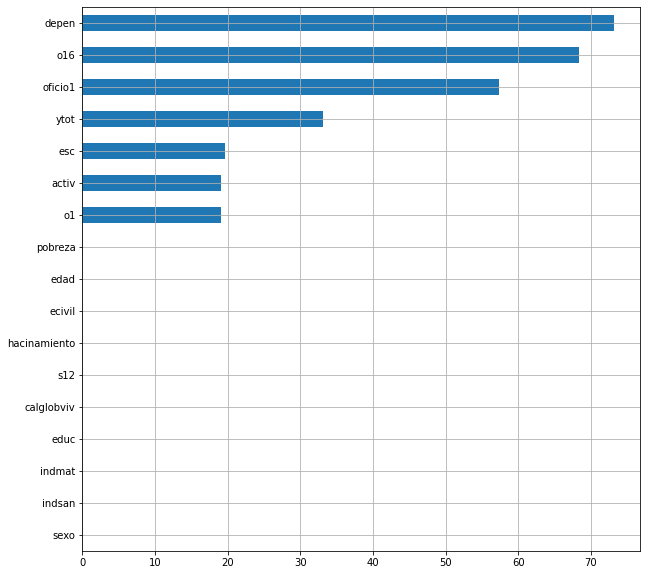

In [5]:

((data.isnull().sum()/len(data))*100).sort_values(ascending=True).plot(kind='barh',figsize=(10,10))
plt.grid(b=True, which='both')

C:\Users\claud\AppData\Local\Temp\ipykernel_32224\3773722473.py:2: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



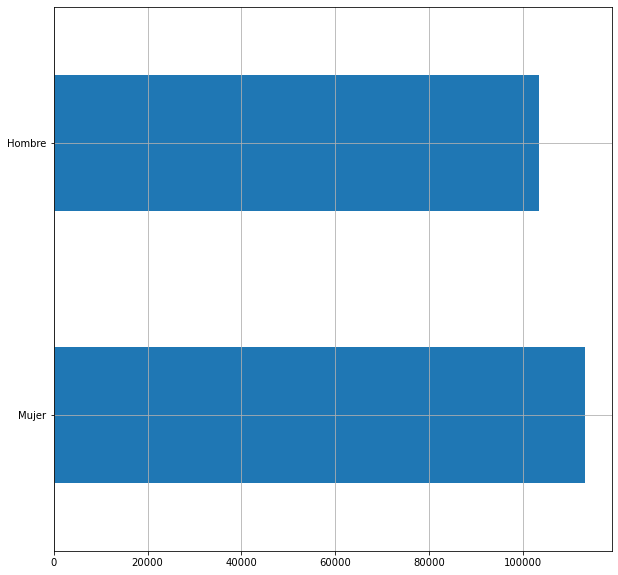

In [6]:
data['sexo'].value_counts().plot(kind='barh', figsize=(10,10))
plt.grid(b=True, which='both')

In [7]:
data['sexo'].value_counts()/len(data)*100

Mujer     52.262762
Hombre    47.737238
Name: sexo, dtype: float64

C:\Users\claud\AppData\Local\Temp\ipykernel_32224\599517549.py:2: MatplotlibDeprecationWarning:

The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.



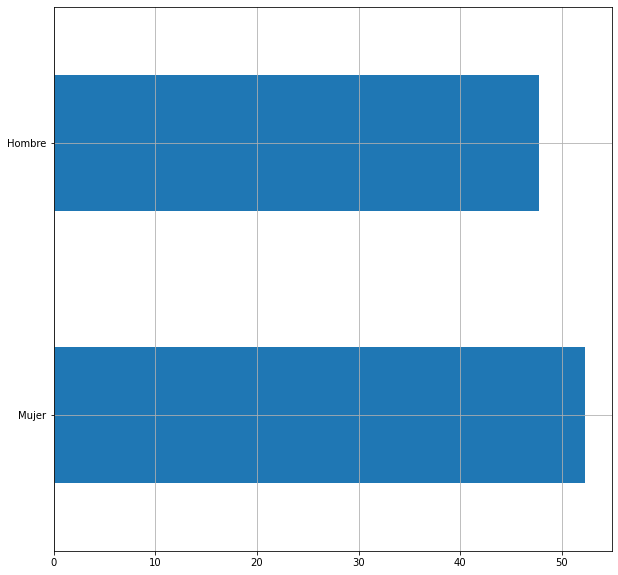

In [8]:
((data['sexo'].value_counts()/len(data))*100).plot(kind='barh', figsize=(10,10))
plt.grid(b=True, which='both')

## contar tipo por sexo
* Hombre y mujeres
* Como podemos ver hay mas mujeres que hombres
* 47.7% hombres y 52.2% mujeres


## Educacion

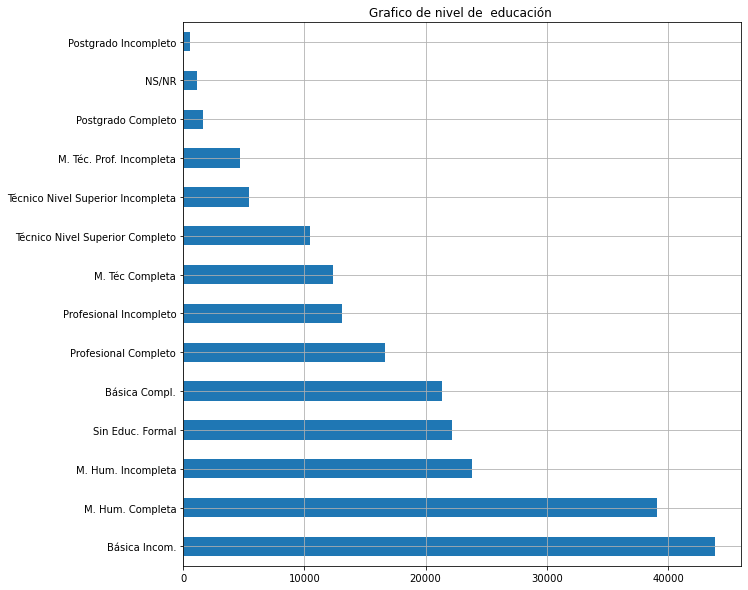

In [9]:
data['educ'].value_counts().plot(kind='barh', figsize=(10,10))
plt.grid()
plt.title("Grafico de nivel de  educación ")
plt.show()

* Hay 14 segmentos diferentes en el dataset 
* El sesgo principal en el nivel de educación se encuentra en basica incompleta
* El segundo en el nivel de educación se encuentra en enseñanza media completa
* el menor en el nivel de educación se encuentra en postgrado incompleto

## Grafico de pie

In [10]:
col = "sexo"
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=600, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

In [11]:
col = "educ"
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
plt.figure(figsize=(10,10))
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))
layout = go.Layout(title="", height=800, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

<Figure size 720x720 with 0 Axes>

In [12]:
pd.crosstab(index= data['activ'], columns=['N'])

col_0,N
activ,
Desocupados,7803
Inactivos,74856
Ocupados,92417


In [13]:
pd.crosstab(index= data['indsan'], columns=['N'])

col_0,N
indsan,
Aceptable,197300
Deficitario,18995
Sin Dato,144


In [18]:
#Filtramos a las personas ocupadas (laboralmente)
data_new= data[data.activ== "Ocupados"]
pd.crosstab(index= data_new['activ'], columns=['N'])

#Borramos columna activ

data_new= data_new.drop(columns=['activ'])

data_new= data_new.dropna()

data_new

,sexo,edad,ecivil,o1,oficio1,o16,s12,ytot,pobreza,esc,educ,depen,indmat,indsan,calglobviv,hacinamiento
folio,,,,,,,,,,,,,,,,
110110100101,Mujer,34,Soltero(a),Sí,Técnicos profesionales de nivel medi,Plazo fijo,Sistema Público FONASA No sabe grupo,400000.0,No pobres,14.0,Profesional Incompleto,Instituto Profesional,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
110110180401,Hombre,23,Soltero(a),Sí,Trabajadores no calificado,Plazo fijo,Sistema Público FONASA Grupo C,300000.0,No pobres,16.0,Profesional Incompleto,Instituto Profesional,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
110110200901,Mujer,20,Soltero(a),Sí,Trabajadores de los servicios y vendedores de ...,Plazo fijo,Sistema Público FONASA Grupo C,220000.0,No pobres,12.0,M. Téc Completa,Municipal,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
110110210101,Hombre,33,Casado(a),Sí,Técnicos profesionales de nivel medi,Plazo indefinido,Sistema Público FONASA No sabe grupo,391091.0,No pobres,15.0,Profesional Incompleto,Universidad del Cruch,Vivienda Recuperable,Aceptable,Recuperable,"Sin hacinamiento (2,49 y menos)"
110110230701,Mujer,25,Casado(a),Sí,Empleados de oficina,Plazo indefinido,Sistema Público FONASA Grupo B,392635.0,No pobres,14.0,Profesional Incompleto,Universidad Privada,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1510113670202,Hombre,24,Soltero(a),Sí,Técnicos profesionales de nivel medi,Plazo indefinido,Sistema Público FONASA Grupo B,300000.0,No pobres,15.0,Técnico Nivel Superior Incompleta,Centro de Formación Técnica,Vivienda Recuperable,Aceptable,Recuperable,"Sin hacinamiento (2,49 y menos)"
1510113710401,Hombre,38,Soltero(a),Sí,Trabajadores no calificado,Plazo fijo,Sistema Público FONASA Grupo B,300000.0,No pobres,15.0,Profesional Incompleto,Universidad del Cruch,Vivienda Recuperable,Aceptable,Recuperable,"Sin hacinamiento (2,49 y menos)"
1510113720201,Hombre,20,Soltero(a),Sí,Empleados de oficina,Plazo indefinido,Sistema Público FONASA No sabe grupo,332500.0,No pobres,12.0,M. Hum. Completa,NS/NR,Vivienda Aceptable,Aceptable,Aceptable,"Sin hacinamiento (2,49 y menos)"


## Como estudio explotario SIEMPRE debemos ver la relación entre nuestros datos de interes, además nos sirve para el modelo de Regresión Lineal

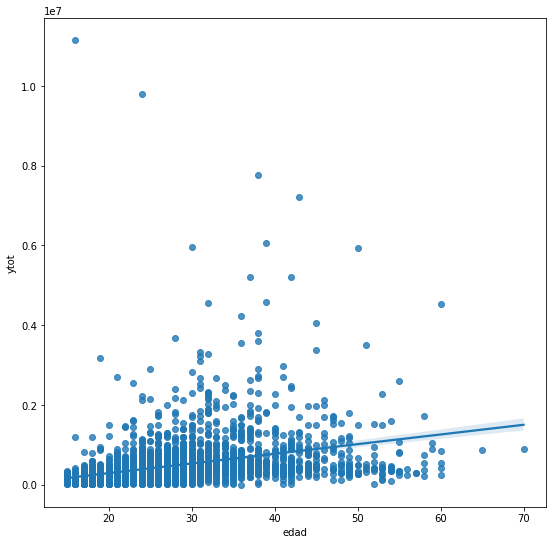

In [ ]:
## el nivel que se nos presentan los datos esta a nivel de 10 (8 es 80)
sns.regplot(x="edad", y="ytot", data=data_new);
## Ojo que hay una recta, esta "escondida" pero si aparece

<AxesSubplot:xlabel='edad', ylabel='ytot'>

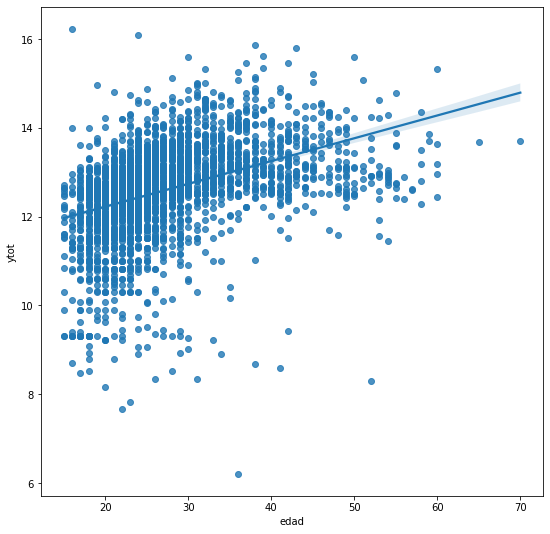

In [ ]:
#Función Logaritmica 
sns.regplot(y= np.log(data_new['ytot']), x=data_new['edad'])

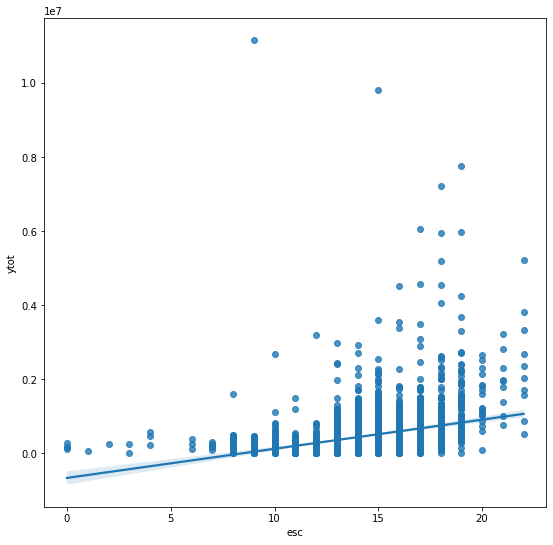

In [ ]:
# Años de escolaridad
sns.regplot(x="esc", y="ytot", data=data_new);

#Hay relación entre el segmento de trabajo y escolaridad???

<AxesSubplot:xlabel='esc', ylabel='ytot'>

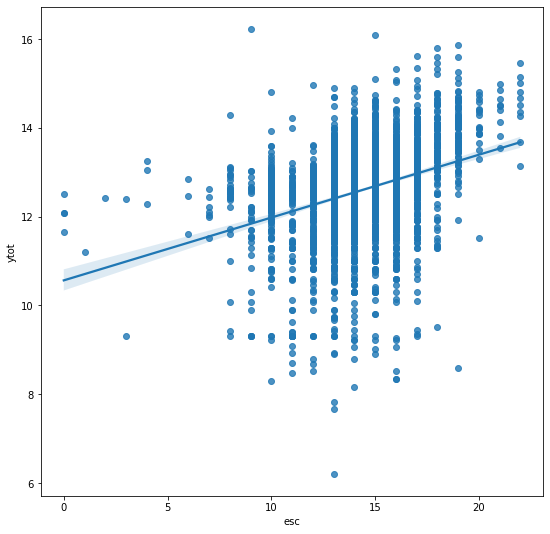

In [ ]:
sns.regplot(y= np.log(data_new['ytot']), x=data_new['esc'])

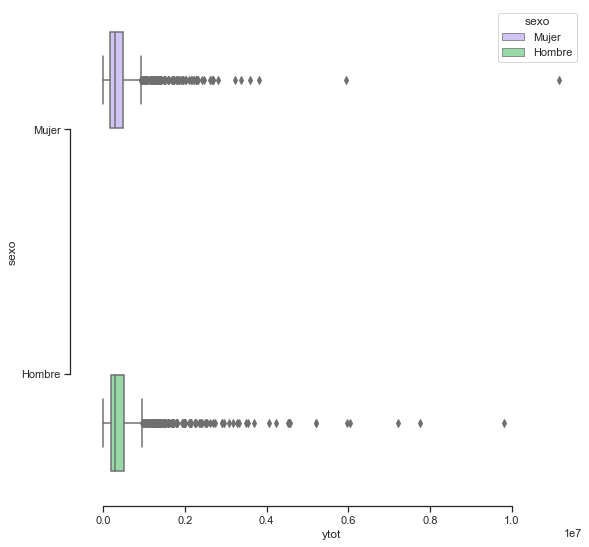

In [ ]:
#Cambiamos nuestro tema
sns.set_theme(style="ticks", palette="pastel")

#Profundizamos en nuestros datos y su relación (Sexo y Salario)
sns.boxplot(x="ytot", y="sexo",
            hue="sexo", palette=["m", "g"],
            data=data_new)
sns.despine(offset=10, trim=True)

## FEA visualización debido a los casos extremos (outliers)

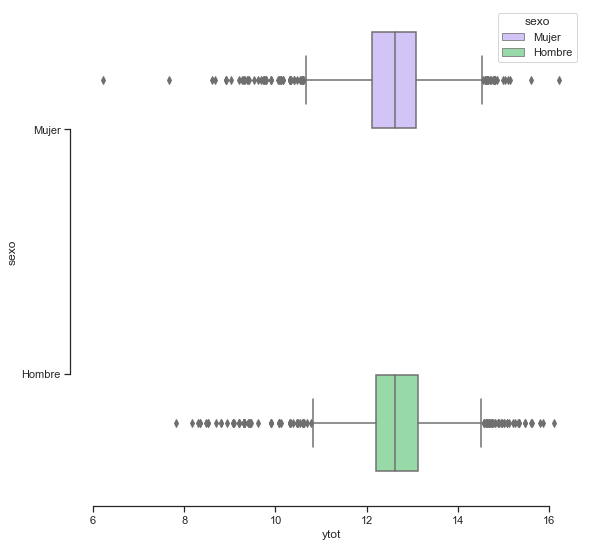

In [ ]:
#Cambiamos nuestro tema
sns.set_theme(style="ticks", palette="pastel")

#Profundizamos en nuestros datos y su relación (Sexo y Salario)
sns.boxplot(x=np.log(data_new["ytot"]), y="sexo",
            hue="sexo", palette=["m", "g"],
            data=data_new)
sns.despine(offset=10, trim=True)

#Ahora estamos en escala logaritmica

In [ ]:
## Clasificacion binaria
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y= make_classification(n_samples=1000,n_classes=2,random_state=1)
# split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
# model de Regresión logistica binaria
from sklearn.linear_model import LogisticRegression
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [ ]:
# matriz confusion
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[128  21]
 [ 28 123]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       149
           1       0.85      0.81      0.83       151

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [ ]:
cm=confusion_matrix(y_test, y_pred)
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]

print(cm)
print('Test de Accuracy = {}'.format((TP + TN) / (TP + TN + FN + FP)))
print('Test de Precision = {}'.format((TP) / (TP + FP)))
print('Test de Recall = {}'.format((TP ) / (TP + FN )))

[[128  21]
 [ 28 123]]
Test de Accuracy = 0.8366666666666667
Test de Precision = 0.8541666666666666
Test de Recall = 0.8145695364238411


In [ ]:
print('Test de accuracy: ' ,round(accuracy_score(y_test,y_pred),2))
print('Test de precision' ,round(precision_score(y_test,y_pred),2))
print('Test de Recall ' ,round(recall_score(y_test,y_pred),2))
print('Test de f1_score ' ,round(f1_score(y_test,y_pred),2))


Test de accuracy:  0.84
Test de precision 0.85
Test de Recall  0.81
Test de f1_score  0.83


In [ ]:
f1=2 * (round(precision_score(y_test,y_pred),2)*round(recall_score(y_test,y_pred),2))/(round(precision_score(y_test,y_pred),2) + round(recall_score(y_test,y_pred),2))
round(f1,2)

0.83

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
cross_val_score(logistic_regression,X_train,y_train,cv=10,scoring ='recall')

array([0.82857143, 0.88571429, 0.91428571, 0.85714286, 0.82857143,
       0.71428571, 0.8       , 0.91428571, 0.91176471, 0.85294118])

In [ ]:
y_train_pred= cross_val_predict(logistic_regression,X_train,y_train,cv=3)
# cross_val_predict nos retorna la clase predicha para cada instancia


## precision y recall

In [ ]:
y_train_pred=cross_val_predict(logistic_regression,X_train,y_train,cv=3)
precision_score(y_train,y_train_pred)

0.830945558739255

In [ ]:
recall_score(y_train,y_train_pred)

0.8333333333333334

In [ ]:
f1_score(y_train,y_train_pred)

0.8321377331420373

## Curva Roc

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.919


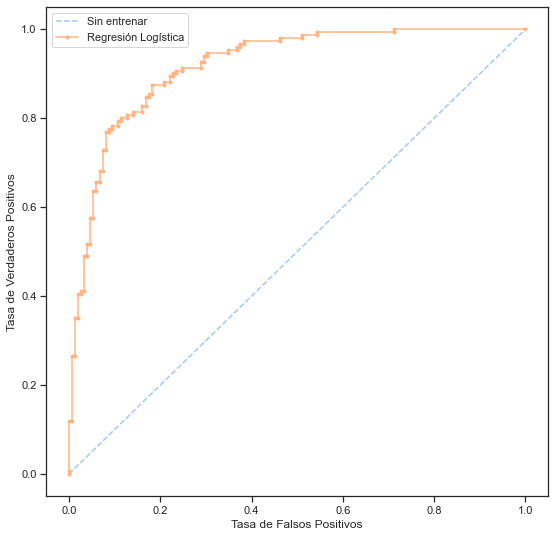

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(y_test))]
# Predecimos las probabilidades
lr_probs = logistic_regression.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# AUC = Area under the curve
roc_auc_score(y_test, lr_probs)

0.9186186052713454